# Rainforest Connection Species Audio Detection

In this challenge we have to predict based on the sounds of various
species of birds and frogs which species the sound will belong to. Traditional methods of assessing the diversity and abundance of
species are costly and limited in space and time. So a deep learning
based approach will be very helpful to accurately detect the species in
noisy landscapes. Rainforest Connection(RFCx) created the world’s first real-time monitoring system for protecting and supporting remote systems and
unlike visual-based tracking systems like drones or satellites, RFCxrelies on acoustic sensors to monitor the ecosystem soundscapes at
different locations all year around. The system built by RFCx also has the capacity to create convolutional
neural network (CNN) models for analysis. In this problem we have to automate the detection of birds and frog species based on sound recordings. There are a total of 23 species of birds and animals present in the train
dataset so this problem is a multi-class classification problem. The link to the problem statement https://www.kaggle.com/c/rfcx-species-audio-detection 

The metric used for evaluation is label-ranking-average precision(LRAP), this metric is linked with average precision score but based on the notion of label ranking instead of precision and recall.

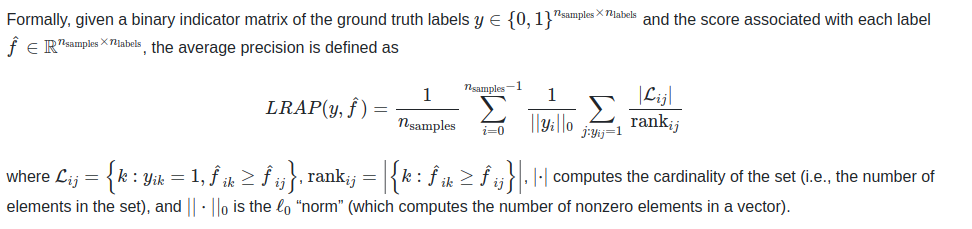

## 1.1 Reading and understanding the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset 
train_tp = pd.read_csv('/content/drive/MyDrive/CS2/train_tp.csv')
train_fp = pd.read_csv('/content/drive/MyDrive/CS2/train_fp.csv')

In [ ]:
train_tp.head()

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70


In [ ]:
# Checking the number of unique values in the dataset 
print("Number of unique items in the dataset",len(train_tp['recording_id'].unique()))
print("Total number of items in the dataset",len(train_tp))

Number of unique items in the dataset 1132
Total number of items in the dataset 1216


As we can see from the above results there are some columns in the dataset that are being repeated in the dataset so removing the comlumns that are repeated.

In [ ]:
train_tp = train_tp.drop_duplicates(subset = ['recording_id'])
train_tp.shape

(1132, 7)

In [ ]:
train_fp = train_fp.drop_duplicates(subset = ['recording_id'])
train_fp.shape

(3958, 7)

In [ ]:
# Checking for any missing values in the dataset 
print("Missing values in train_tp ",train_tp.isnull().values.any())
print("Missing values in test_tp ",train_fp.isnull().values.any())

Missing values in train_tp  False
Missing values in test_tp  False


There are no missing values in the dataset.

In [ ]:
train_tp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recording_id  1132 non-null   object 
 1   species_id    1132 non-null   int64  
 2   songtype_id   1132 non-null   int64  
 3   t_min         1132 non-null   float64
 4   f_min         1132 non-null   float64
 5   t_max         1132 non-null   float64
 6   f_max         1132 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 70.8+ KB


In [ ]:
train_fp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 7780
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recording_id  3958 non-null   object 
 1   species_id    3958 non-null   int64  
 2   songtype_id   3958 non-null   int64  
 3   t_min         3958 non-null   float64
 4   f_min         3958 non-null   float64
 5   t_max         3958 non-null   float64
 6   f_max         3958 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 247.4+ KB


## 1.2 Univariate Analysis of True Positive data

Text(0, 0.5, 'Count')

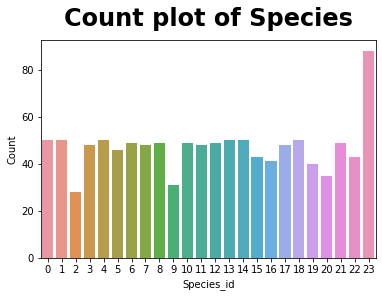

In [ ]:
# Plotting a countplot of species 
sns.countplot(train_tp['species_id'])
plt.title("Count plot of Species", fontweight = 'bold', fontsize = 24, y =1.04)
plt.xlabel('Species_id')
plt.ylabel('Count')

From the above plot we can see that the count of species in the dataset are pretty much evenly spread out. The species id 23 has the the maximum occurance in around 85 times and the species id 2 has minimum occurance around 27 times and most other features occur around 45-55 times.

Text(0, 0.5, 'Count')

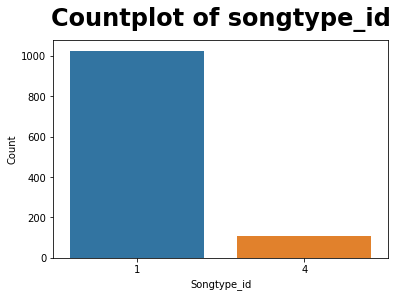

In [ ]:
sns.countplot(train_tp['songtype_id'])
plt.title('Countplot of songtype_id', fontweight = 'bold', fontsize = 24, y =1.04)
plt.xlabel('Songtype_id')
plt.ylabel('Count')

From the above countplot we can see that the songtype id 1 occurs most number of times around 1050 times and whereas the other songtype id 4 occurs only 120 times in the dataset.

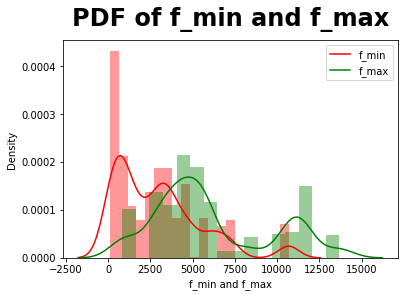

In [ ]:
sns.distplot(train_tp['f_min'],color = 'red')
sns.distplot(train_tp['f_max'],color = 'green')
plt.title("PDF of f_min and f_max", fontweight = 'bold', fontsize = 24, y =1.04)
plt.xlabel('f_min and f_max')
plt.ylabel('Density')
plt.legend(['f_min', 'f_max']);

This distribution plot shows us the PDF of f_min and f_max values in the dataset. As we can see from the distribution and the histograms f_min values occur the most number of times around 0-200 range as seen from the tall plot of histogram and the f_max values occur most number of times at around 5000 range as seen from the plot.

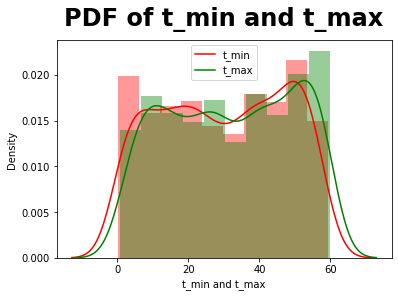

In [ ]:
sns.distplot(train_tp['t_min'],color = 'red')
sns.distplot(train_tp['t_max'],color = 'green')
plt.title("PDF of t_min and t_max", fontweight = 'bold', fontsize = 24, y =1.04)
plt.xlabel('t_min and t_max')
plt.ylabel('Density')
plt.legend(['t_min', 't_max']);

The above plot represents the PDF of t_min and t_max functions as we can see from the plot both the values are almost equal to each other with only slight difference in value range between them. 

# 1.3 Univariate Analysis of false positive data

Text(0, 0.5, 'Count')

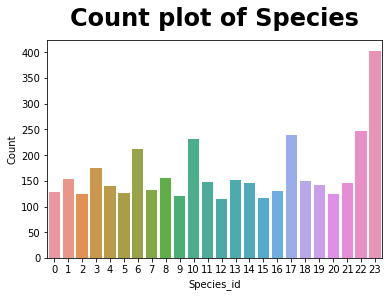

In [ ]:
# Plotting a countplot of species 
sns.countplot(train_fp['species_id'])
plt.title("Count plot of Species", fontweight = 'bold', fontsize = 24, y =1.04)
plt.xlabel('Species_id')
plt.ylabel('Count')

The above plot represents the count plot of the number of species id occuring in the false positive data. We can see that the species number 23 occurs the most number of times almost 400 times throughout the dataset and features like 6, 10 , 17 and 22 occur 230-250 times and all other features occur around 100-150 times in the dataset.

Text(0, 0.5, 'Count')

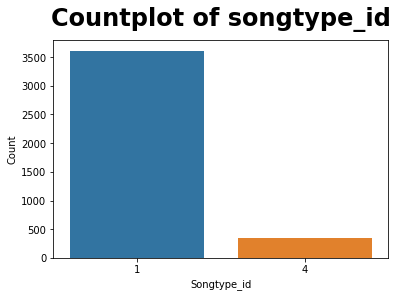

In [ ]:
sns.countplot(train_fp['songtype_id'])
plt.title('Countplot of songtype_id', fontweight = 'bold', fontsize = 24, y =1.04)
plt.xlabel('Songtype_id')
plt.ylabel('Count')

The above plot is a countplot of the number of occurances of songtype_id in the dataset. As we can see from the plot the songtype_id 1 occurs arounf 3500 times and whereas the other songtype id 4 occurs only 500 times. This shows that songtype_id 1 is the most prominent and occurs most of the times throughout the dataset.

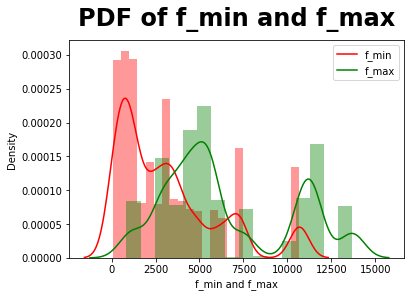

In [ ]:
sns.distplot(train_fp['f_min'],color = 'red')
sns.distplot(train_fp['f_max'],color = 'green')
plt.title("PDF of f_min and f_max", fontweight = 'bold', fontsize = 24, y =1.04)
plt.xlabel('f_min and f_max')
plt.ylabel('Density')
plt.legend(['f_min', 'f_max']);

This plot represents the PDF of f_min and f_max values in the false positive dataset. As we can see form the distribution and the histograms f_min values occurs most between 0-1500 range as seen from the tall histogram for these range of values and for f_max they occur most times in range 4000-5500 as seen from the green histgram plots.

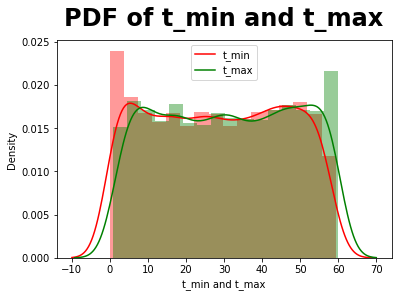

In [ ]:
sns.distplot(train_fp['t_min'],color = 'red')
sns.distplot(train_fp['t_max'],color = 'green')
plt.title("PDF of t_min and t_max", fontweight = 'bold', fontsize = 24, y =1.04)
plt.xlabel('t_min and t_max')
plt.ylabel('Density')
plt.legend(['t_min', 't_max']);

This plot represents the distribution of t_min and t_max values in the false positive dataset and as we can see from the plot the difference between the two values is not very much except in the start and at the end of the plots.

## 1.4 Bivariate analysis of True Positive data 

In [ ]:
# Reference - https://www.kaggle.com/alkahapur/exploratory-data-analysis-and-modelling-using-cnn 
def plot_feature_distribution(data_df, feature, feature2, title, kde_mode=False, hist_mode=True):
    # Defining the plot size 
    f, ax = plt.subplots(1,1, figsize=(12,6))
    colors = {0: '#68615c',1: '#8ef6aa', 2: '#f77ce2', 3: '#7dffe0',4: '#669b1f', 5: '#a05812', 6: '#364f8b', 7: '#89ef86', 8: '#3fd43f', 9: '#2830b4', 10: '#07f8c2', 11: '#edf420',
 12: '#82176c', 13: '#d712a8', 14: '#0a79fc', 15: '#bfdbca', 16: '#62cffd', 17: '#0f5f3e', 18: '#42d2cd', 19: '#a02e97', 20: '#d6d99f', 21: '#11c5d9', 22: '#ac8ed5', 23: '#7ebb56'}
    # Looping through all the unqiue items in feature2
    for item in list(data_df[feature2].unique()):
        # Selecting features which has corresponding item in feature2
        d_df = data_df.loc[data_df[feature2]==item]
        try:
            # Plotting the distribution plot
            sns.distplot(d_df[feature], kde=kde_mode, hist=hist_mode, label=item,color = colors[item])
        except:
            pass
    # Plotting the legend, title and displaying the plot
    plt.legend(labels=list(data_df[feature2].unique()), bbox_to_anchor=(1, 1), loc='upper right', ncol=2)
    plt.title(title, fontweight = 'bold', fontsize = 24, y =1.04)
    plt.show()

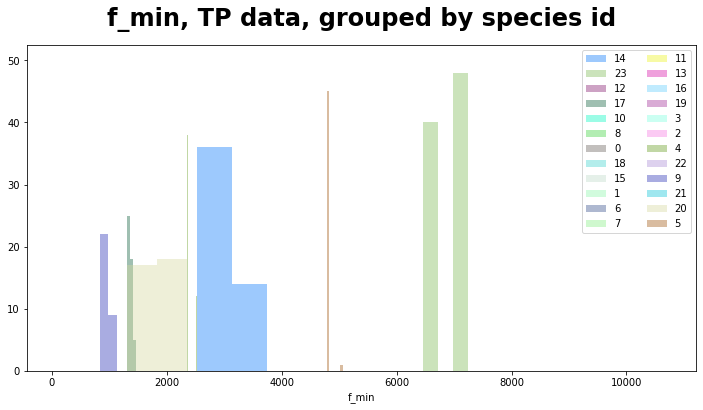

In [ ]:
plot_feature_distribution(train_tp, 'f_min', 'species_id', "f_min, TP data, grouped by species id")

In this plot we are plotting the f_min for true positive data with the species id this shows us the various values of f_min associated with each species_id. We can see that for species id 14 f_min lies between 2300 and 3700 and for 20 lies around 1500-2200 and various other species represented by a single straight line like 1 and 5 show us that for these ids f_min lies in a vaery small range or even a sinle value.

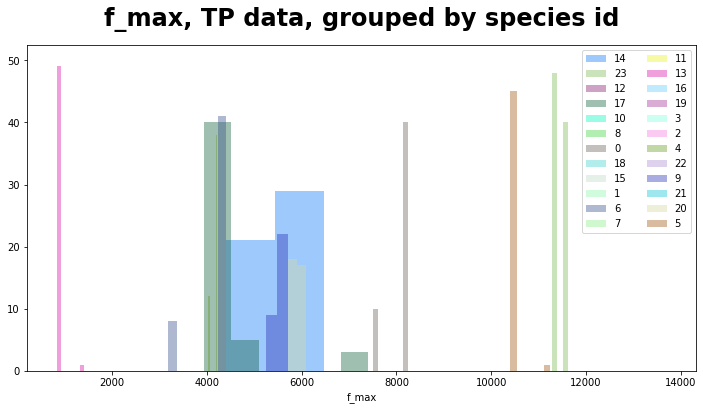

In [ ]:
plot_feature_distribution(train_tp, 'f_max', 'species_id', "f_max, TP data, grouped by species id")

In this plot we are plotting f_max values for true positive data and the species_id from the plot we can see that the value of species 14 is spread out over a large area in the range from 4000-6200 and most other species are represented by a small histogram indicating that for those particular species type the value lies in a small range and for species 13 it has the lowest max frequency of around 800. 

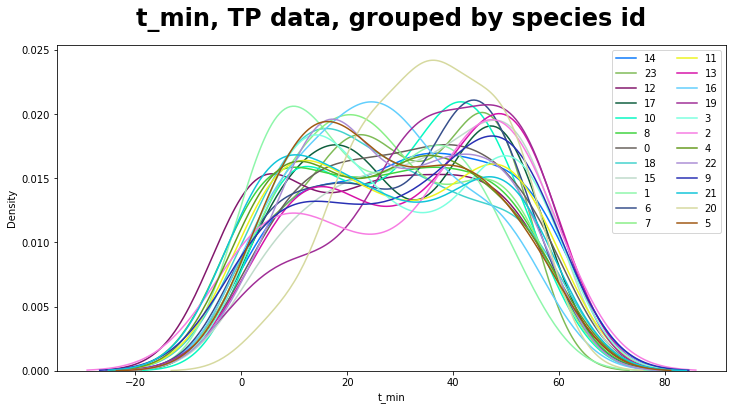

In [ ]:
plot_feature_distribution(train_tp, 't_min', 'species_id', "t_min, TP data, grouped by species id",kde_mode=True, hist_mode=False)

This plot is a representing the distribution of t_min values for each species_id as we can see from the plot the plots for the species ids are overlapping so we can say that t_min does not change very much with the species_ids.

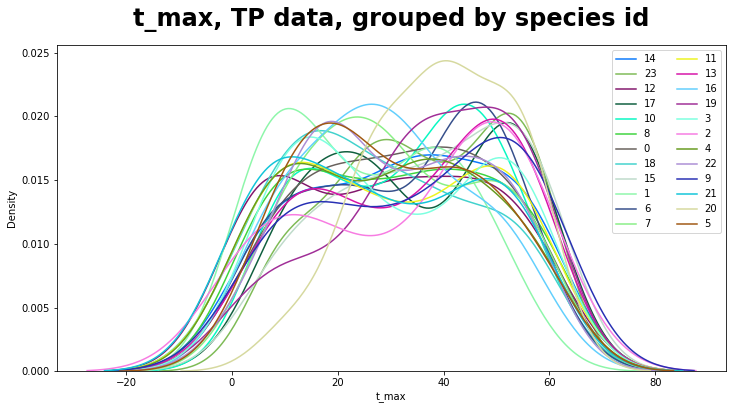

In [ ]:
plot_feature_distribution(train_tp, 't_max', 'species_id', "t_max, TP data, grouped by species id",kde_mode=True, hist_mode=False)

The above plot represents the distribution plot of t_max values with the species_ids as we can see from the plots the distributions are largely overlapping meaning that the t_max values are not very much dependent on the species_ids

## 1.5 Bivariate analysis of False positive train data 

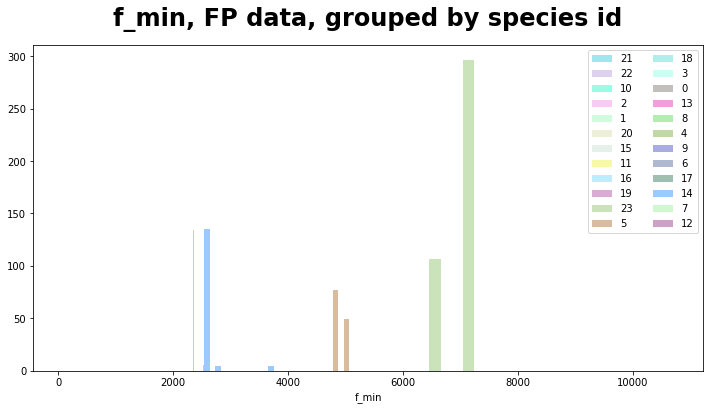

In [ ]:
plot_feature_distribution(train_fp, 'f_min', 'species_id', "f_min, FP data, grouped by species id")

This plot represents the f_min values with the species_ids for false positive data. as we can see from the plot the that species_id 4 has two tall histogram values indicating the corresponding values of f_min and from the plot we can see for species_id 5 it has a value around 5000. 

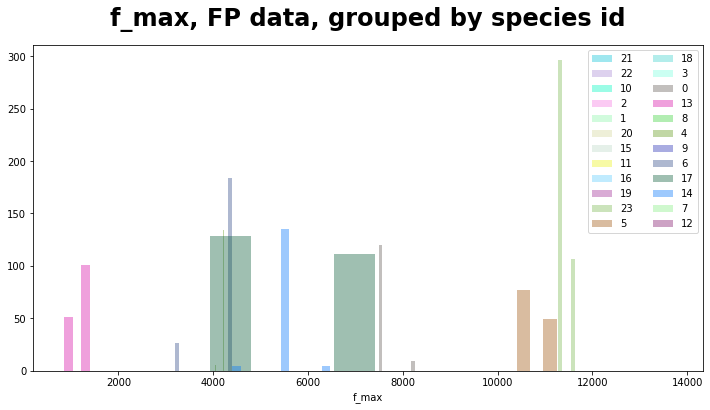

In [ ]:
plot_feature_distribution(train_fp, 'f_max', 'species_id', "f_max, FP data, grouped by species id")

This plot represents the plot of f_max values with species_ids as we can see from the plot for species_id 17 the value ranges from 6800-7300 and from 3900-4500 and for species_id 13 it has the lowest values arounf 1000 and 1200 and various other species have a single straight histogram indicating that the range in which f_max is spread out for these species is very small.

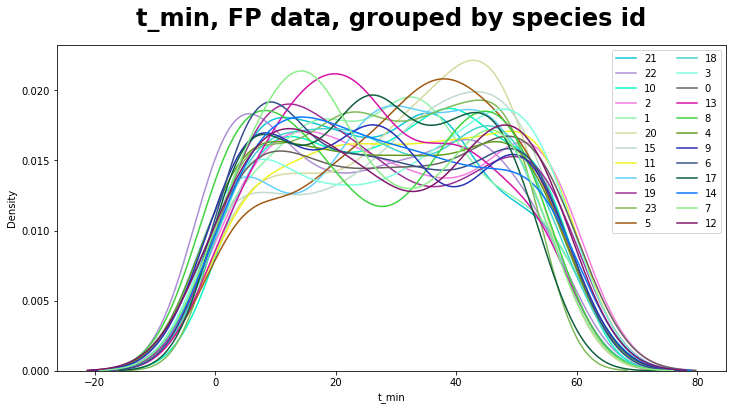

In [ ]:
plot_feature_distribution(train_fp, 't_min', 'species_id', "t_min, FP data, grouped by species id",kde_mode=True, hist_mode=False)

This plot represents the distribution plot of t_min with all the species_ids as we can see from the plot the distributions are overlapping indicating that t_min values are not dependent on the species_ids.

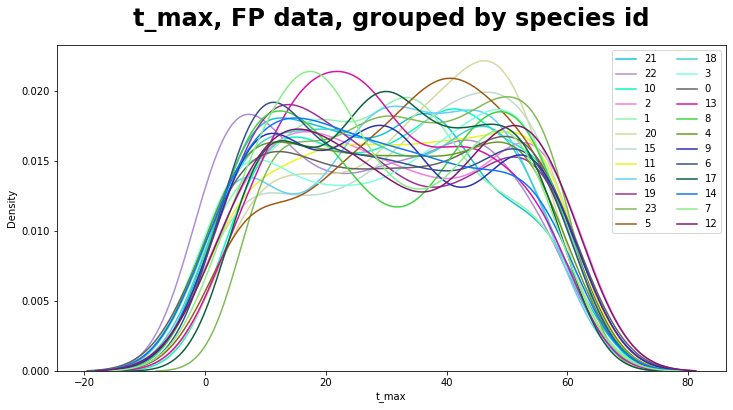

In [ ]:
plot_feature_distribution(train_fp, 't_max', 'species_id', "t_max, FP data, grouped by species id",kde_mode=True, hist_mode=False)

This plot represents the distributions of t_max values for false positive train data with species_ids as we can see from the plot the distributions are largely overlapping so we can say that the t_max values are not dependent on the species_ids.